### Importing the requrired Libraries

In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
import tensorflow as tf
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from tensorflow.keras.optimizers import SGD,Adagrad,Adam,AdamW,RMSprop

### Extracting the required data

In [2]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

### Exploratory Data Analysis 

In [3]:
print(f'Shape of the train dataset is {train_df.shape}')
print(f'Shape of the test dataset is {test_df.shape}')

Shape of the train dataset is (891, 12)
Shape of the test dataset is (418, 11)


In [4]:
round((train_df.isnull().sum()/train_df.shape[0])*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [5]:
# Cabin has a lot of missing data so can be dropped
train_df.drop(['Cabin'],axis=1,inplace=True)

In [6]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [7]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0],inplace=True)

In [9]:
train_df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
round((train_df.isnull().sum()/train_df.shape[0])*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Embarked        0.00
dtype: float64

### Age is missing --> so I decided to use ML to predict the missing values of the age

In [11]:
for each_col in train_df.columns:
    print(f'{each_col} has {train_df[each_col].nunique()} unique entries','\n')

PassengerId has 891 unique entries 

Survived has 2 unique entries 

Pclass has 3 unique entries 

Name has 891 unique entries 

Sex has 2 unique entries 

Age has 88 unique entries 

SibSp has 7 unique entries 

Parch has 7 unique entries 

Ticket has 681 unique entries 

Fare has 248 unique entries 

Embarked has 3 unique entries 



In [12]:
extracted_data_for_training=train_df.pop('Survived')

In [13]:
train_df.drop(['PassengerId','Name','Ticket'],inplace=True,axis=1)

In [14]:
col_for_dummy=[each_col for each_col in train_df.columns if train_df[each_col].nunique()<=10 ]

In [15]:
train_df_encoded=pd.get_dummies(columns=col_for_dummy,drop_first=True,data=train_df)

In [16]:
minmax_Fare=MinMaxScaler()

In [17]:
train_df_encoded['Fare']=minmax_Fare.fit_transform(train_df_encoded[['Fare']])

In [18]:
df_age_missing=train_df_encoded[train_df_encoded.Age.isna()]
df_age_available=train_df_encoded[~train_df_encoded.Age.isna()]

In [19]:
df_age_available.head(10)

,Age,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,22.0,0.014151,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,38.0,0.139136,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,26.0,0.015469,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,35.0,0.103644,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,35.0,0.015713,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,54.0,0.101229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,2.0,0.041136,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
8,27.0,0.021731,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
9,14.0,0.058694,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10,4.0,0.032596,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1


In [20]:
df_age_available.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [21]:
max_age=df_age_available.loc[df_age_available['Age'].idxmax()]
max_age

Age           80.000000
Fare           0.058556
Pclass_2       0.000000
Pclass_3       0.000000
Sex_male       1.000000
SibSp_1        0.000000
SibSp_2        0.000000
SibSp_3        0.000000
SibSp_4        0.000000
SibSp_5        0.000000
SibSp_8        0.000000
Parch_1        0.000000
Parch_2        0.000000
Parch_3        0.000000
Parch_4        0.000000
Parch_5        0.000000
Parch_6        0.000000
Embarked_Q     0.000000
Embarked_S     1.000000
Name: 630, dtype: float64

In [22]:
min_age=df_age_available.loc[df_age_available['Age'].idxmin()]
min_age

Age           0.420000
Fare          0.016623
Pclass_2      0.000000
Pclass_3      1.000000
Sex_male      1.000000
SibSp_1       0.000000
SibSp_2       0.000000
SibSp_3       0.000000
SibSp_4       0.000000
SibSp_5       0.000000
SibSp_8       0.000000
Parch_1       1.000000
Parch_2       0.000000
Parch_3       0.000000
Parch_4       0.000000
Parch_5       0.000000
Parch_6       0.000000
Embarked_Q    0.000000
Embarked_S    0.000000
Name: 803, dtype: float64

In [23]:
minmax_Age=MinMaxScaler()

In [24]:
df_age_available['Age']=minmax_Age.fit_transform(df_age_available[['Age']])

In [25]:
max_age=df_age_available.loc[df_age_available.Age.idxmax()]
max_age

Age           1.000000
Fare          0.058556
Pclass_2      0.000000
Pclass_3      0.000000
Sex_male      1.000000
SibSp_1       0.000000
SibSp_2       0.000000
SibSp_3       0.000000
SibSp_4       0.000000
SibSp_5       0.000000
SibSp_8       0.000000
Parch_1       0.000000
Parch_2       0.000000
Parch_3       0.000000
Parch_4       0.000000
Parch_5       0.000000
Parch_6       0.000000
Embarked_Q    0.000000
Embarked_S    1.000000
Name: 630, dtype: float64

In [26]:
min_age=df_age_available.loc[df_age_available.Age.idxmin()]
min_age

Age           0.000000
Fare          0.016623
Pclass_2      0.000000
Pclass_3      1.000000
Sex_male      1.000000
SibSp_1       0.000000
SibSp_2       0.000000
SibSp_3       0.000000
SibSp_4       0.000000
SibSp_5       0.000000
SibSp_8       0.000000
Parch_1       1.000000
Parch_2       0.000000
Parch_3       0.000000
Parch_4       0.000000
Parch_5       0.000000
Parch_6       0.000000
Embarked_Q    0.000000
Embarked_S    0.000000
Name: 803, dtype: float64

In [27]:
cm=df_age_available.corr()

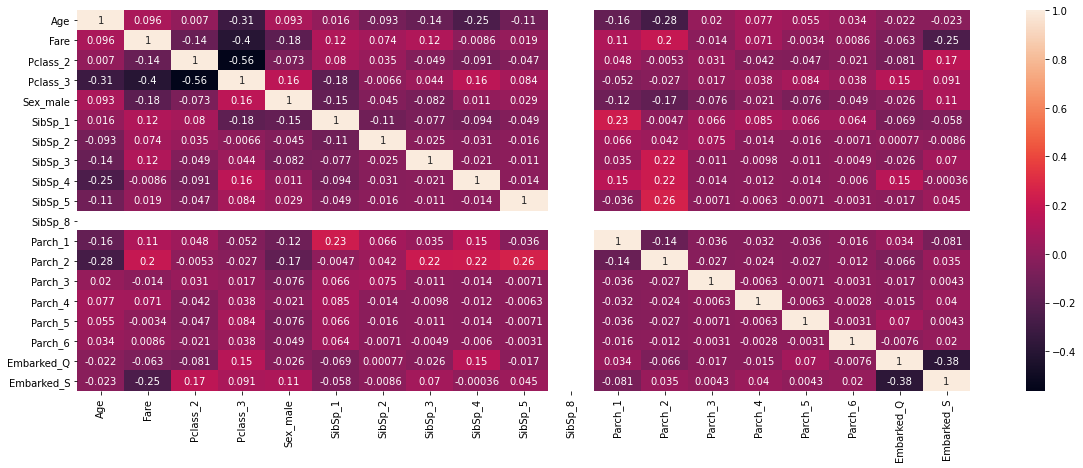

In [28]:
plt.figure(figsize=(20,7))
sns.heatmap(data=cm,annot=True)
plt.show()

In [29]:
xgb_model=xgb.XGBRegressor(n_estimators=100,learning_rate=0.1,max_depth=3,objective='reg:squarederror',eval_metric='mae')

In [30]:
y_age=df_age_available['Age']
X_age=df_age_available[[each_col for each_col in df_age_available.columns if each_col!='Age']]

In [31]:
xgb_model.fit(X=X_age,y=y_age)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='mae', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [32]:
df_age_missing.head(10)

,Age,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
5,NaN,0.016510,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
17,NaN,0.025374,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
19,NaN,0.014102,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26,NaN,0.014102,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28,NaN,0.015379,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
29,NaN,0.015412,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
31,NaN,0.285990,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
32,NaN,0.015127,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
36,NaN,0.014110,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42,NaN,0.015412,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
X_age=df_age_missing[[each_col for each_col in df_age_missing.columns if each_col!='Age']]

In [34]:
df_age_missing['Age']=xgb_model.predict(X_age)

In [35]:
df_age_missing

,Age,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
5,0.428070,0.016510,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
17,0.401353,0.025374,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
19,0.256928,0.014102,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26,0.348896,0.014102,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28,0.293404,0.015379,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0.341499,0.014110,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
863,0.242721,0.135753,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
868,0.351353,0.018543,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
878,0.357273,0.015412,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [36]:
train_df_encoded=pd.concat([df_age_available,df_age_missing],ignore_index=False)

In [37]:
df_age_available.index

Int64Index([  0,   1,   2,   3,   4,   6,   7,   8,   9,  10,
            ...
            880, 881, 882, 883, 884, 885, 886, 887, 889, 890],
           dtype='int64', length=714)

In [38]:
df_age_missing.index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [39]:
not df_age_available.index.isin(df_age_missing.index).any()

True

In [40]:
train_df_encoded.head(20)

,Age,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,0.271174,0.014151,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.472229,0.139136,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.321438,0.015469,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.434531,0.103644,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.434531,0.015713,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0.673285,0.101229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,0.019854,0.041136,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
8,0.334004,0.021731,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
9,0.170646,0.058694,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0.044986,0.032596,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1


In [41]:
train_df_encoded.sort_index(inplace=True)

In [42]:
train_df_encoded.head(20)

,Age,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,0.271174,0.014151,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.472229,0.139136,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.321438,0.015469,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.434531,0.103644,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.434531,0.015713,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0.428070,0.016510,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,0.673285,0.101229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,0.019854,0.041136,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
8,0.334004,0.021731,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
9,0.170646,0.058694,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### Continuing the EDA 

In [43]:
train_df_encoded=pd.merge(left=train_df_encoded,right=pd.DataFrame(extracted_data_for_training),how='inner',left_index=True,right_index=True)

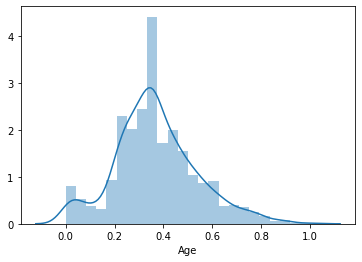

In [44]:
sns.distplot(train_df_encoded['Age'])
plt.show()

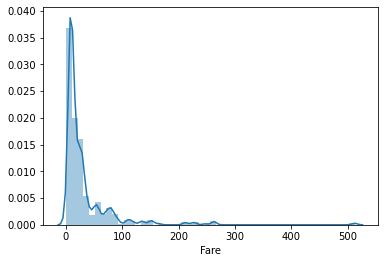

In [45]:
sns.distplot(train_df.Fare)
plt.show()

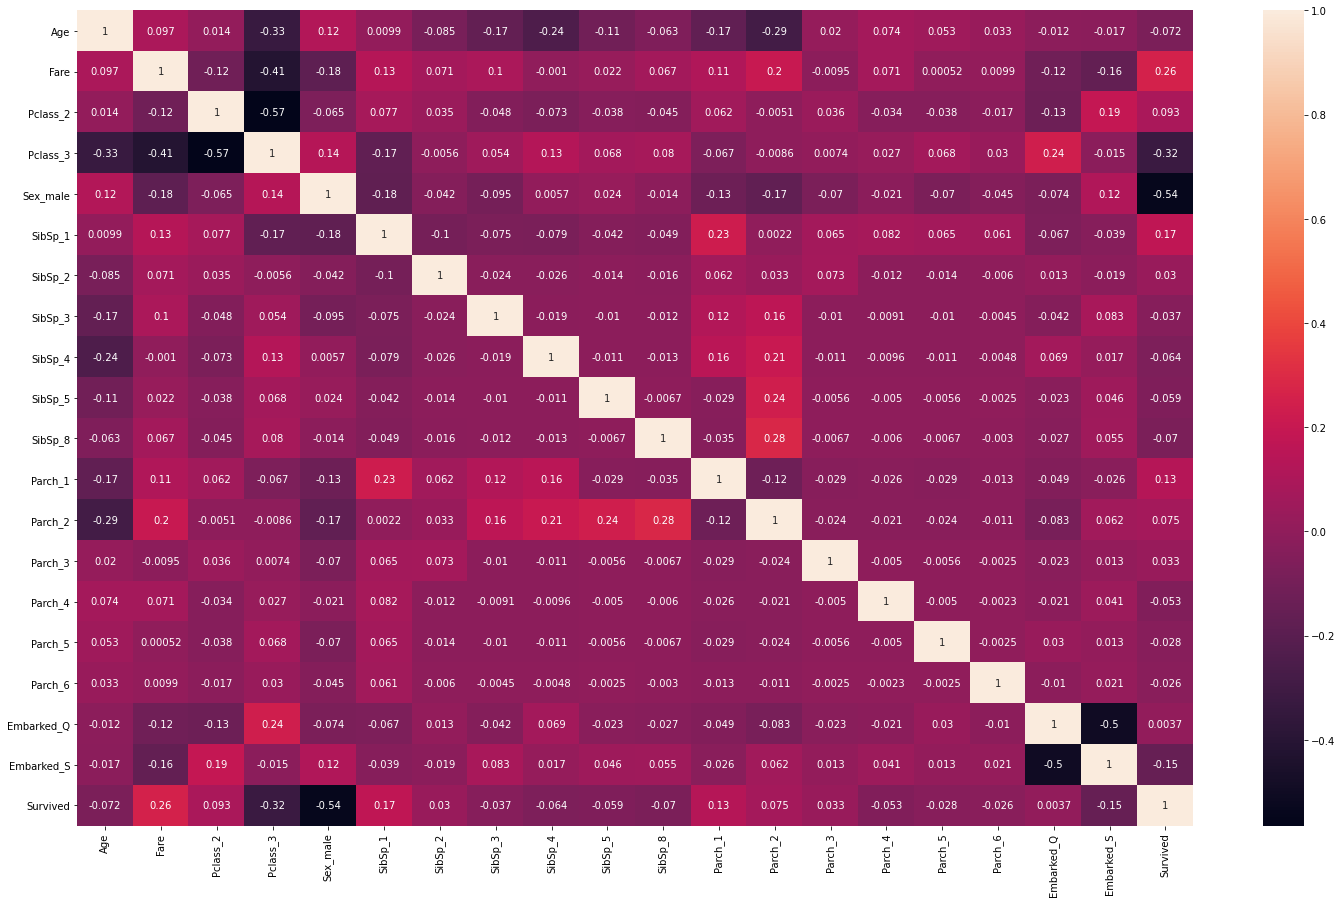

In [46]:
plt.figure(figsize=(25,15))
cm=train_df_encoded.corr()
sns.heatmap(cm,annot=True)
plt.show()

### Building a neural network for the predcition

In [47]:
y_train=train_df_encoded['Survived']
X_train=train_df_encoded[[each_col for each_col in train_df_encoded.columns if each_col!='Survived']]

In [48]:
model =keras.Sequential([
    keras.layers.Dense(X_train.shape[1]*20,input_shape=(X_train.shape[1],),activation='relu'),
    keras.layers.Dense(X_train.shape[1]*10,activation='relu'),
    keras.layers.Dense(X_train.shape[1]*5,activation='relu'),
    keras.layers.Dense(X_train.shape[1],activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
    
])

In [49]:
optimizer_data = RMSprop(learning_rate=0.0001, rho=0.99, epsilon=1e-09)

In [50]:
model.compile(optimizer=optimizer_data,loss='binary_crossentropy',metrics='accuracy')

In [51]:
model.fit(x=X_train,y=y_train,epochs=100,batch_size=16)

Epoch 1/100
56/56 [==============================] - 1s 3ms/step - loss: 0.6273 - accuracy: 0.7508
Epoch 2/100
56/56 [==============================] - 0s 3ms/step - loss: 0.5113 - accuracy: 0.7901
Epoch 3/100
56/56 [==============================] - 0s 3ms/step - loss: 0.4675 - accuracy: 0.8002
Epoch 4/100
56/56 [==============================] - 0s 2ms/step - loss: 0.4521 - accuracy: 0.8025
Epoch 5/100
56/56 [==============================] - 0s 3ms/step - loss: 0.4455 - accuracy: 0.8036
Epoch 6/100
56/56 [==============================] - 0s 3ms/step - loss: 0.4371 - accuracy: 0.8036
Epoch 7/100
56/56 [==============================] - 0s 2ms/step - loss: 0.4332 - accuracy: 0.8148
Epoch 8/100
56/56 [==============================] - 0s 3ms/step - loss: 0.4281 - accuracy: 0.8103
Epoch 9/100
56/56 [==============================] - 0s 3ms/step - loss: 0.4247 - accuracy: 0.8114
Epoch 10/100
56/56 [==============================] - 0s 3ms/step - loss: 0.4207 - accuracy: 0.8171
Epoch 11/

56/56 [==============================] - 0s 3ms/step - loss: 0.3468 - accuracy: 0.8496
Epoch 84/100
56/56 [==============================] - 0s 3ms/step - loss: 0.3465 - accuracy: 0.8563
Epoch 85/100
56/56 [==============================] - 0s 3ms/step - loss: 0.3456 - accuracy: 0.8462
Epoch 86/100
56/56 [==============================] - 0s 3ms/step - loss: 0.3446 - accuracy: 0.8507
Epoch 87/100
56/56 [==============================] - 0s 2ms/step - loss: 0.3461 - accuracy: 0.8530
Epoch 88/100
56/56 [==============================] - 0s 2ms/step - loss: 0.3447 - accuracy: 0.8530
Epoch 89/100
56/56 [==============================] - 0s 3ms/step - loss: 0.3428 - accuracy: 0.8530
Epoch 90/100
56/56 [==============================] - 0s 3ms/step - loss: 0.3440 - accuracy: 0.8530
Epoch 91/100
56/56 [==============================] - 0s 3ms/step - loss: 0.3419 - accuracy: 0.8507
Epoch 92/100
56/56 [==============================] - 0s 3ms/step - loss: 0.3429 - accuracy: 0.8519
Epoch 93/100


### Making the Predictions on the test dataset

In [52]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [53]:
### Removing the columns which are of no use / were removed from the training phase

In [54]:
test_df.drop(['PassengerId','Name','Ticket','Cabin'],inplace=True,axis=1)

In [55]:
test_df.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [56]:
test_df.Fare.fillna(value=test_df.Fare.mean(),inplace=True)

In [57]:
test_df_encoded=pd.get_dummies(data=test_df,columns=col_for_dummy,drop_first=True)

In [58]:
# need to drop this column as it is only available in the test dataset
test_col_only=[col for col in test_df_encoded.columns if col not in train_df_encoded]
test_df_encoded.drop(test_col_only,inplace=True,axis=1)

In [59]:
test_df_encoded['Fare']=minmax_Fare.transform(test_df_encoded[['Fare']])

In [60]:
df_age_available=test_df_encoded[~test_df_encoded.Age.isna()]

In [61]:
df_age_missing=test_df_encoded[test_df_encoded.Age.isna()]

In [62]:
df_age_available['Age']=minmax_Age.transform(df_age_available[['Age']])

In [63]:
X_age=df_age_missing[[each_col for each_col in df_age_missing.columns if each_col!='Age']]

In [64]:
df_age_missing['Age']=xgb_model.predict(X_age)

In [65]:
test_df_encoded=pd.concat([df_age_available,df_age_missing],ignore_index=False)

In [66]:
test_df_encoded.sort_index(inplace=True)

In [67]:
test_df_encoded['Survived_Probability']=model.predict(test_df_encoded)
test_df_encoded['Survived']=test_df_encoded['Survived_Probability'].apply(lambda x: 1 if x>0.5 else 0)

14/14 [==============================] - 0s 3ms/step


In [68]:
test_df_encoded

,Age,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S,Survived_Probability,Survived
0,0.428248,0.015282,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0.049765,0
1,0.585323,0.013663,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0.229118,0
2,0.773813,0.018909,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0.029669,0
3,0.334004,0.016908,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.117382,0
4,0.271174,0.023984,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0.564976,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.358795,0.015713,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.115319,0
414,0.484795,0.212559,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.979089,1
415,0.478512,0.014151,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.101354,0
416,0.358795,0.015713,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.115319,0


### Submitting the prediction csv

In [69]:
test_df=pd.read_csv('test.csv')

In [70]:
predictions_csv=pd.DataFrame({'PassengerId':test_df['PassengerId'],'Survived':test_df_encoded['Survived']})

In [71]:
predictions_csv.to_csv(r'D:\predictions.csv',index=False)